# 用来测试代码

Lasso(alpha=0.1)
r^2 on test data : 0.385982
测试!
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -5.75106582e-01
  1.39107505e+00 -0.00000000e+00  3.24849662e-01 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  6.59560879e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.85209169e-01 -0.00000000e+00
 -4.72098877e-03 -0.00000000e+00  0.00000000e+00  4.01200504e-01
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  2.24606381e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.01986123e-02 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -7.85558

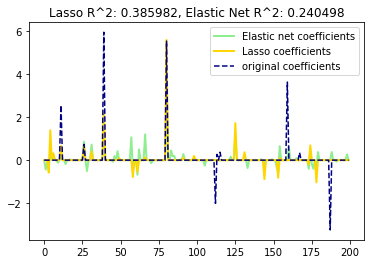

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#def main():
# 产生一些稀疏数据
np.random.seed(42)
n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features) # randn(...)产生的是正态分布的数据
coef = 3 * np.random.randn(n_features)     # 每个特征对应一个系数
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # 稀疏化系数--随机的把系数向量1x200的其中10个值变为0
y = np.dot(X, coef)  # 线性运算 -- y = X.*w
# 添加噪声：零均值，标准差为 0.01 的高斯噪声
y += 0.01 * np.random.normal(size=n_samples)

# 把数据划分成训练集和测试集
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# 训练 Lasso 模型
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

print("测试!")
print(lasso.coef_)

# 训练 ElasticNet 模型
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()
